In [1331]:

import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
# original
pd.options.display.max_columns = 20
pd.options.display.max_rows = 60
# new set
pd.options.display.max_columns = 150
#pd.options.display.max_rows = 2000
print(tf.__version__)

2.7.0


In [1332]:
df = pd.read_csv(r"dataset_v10.csv",index_col=[0])
df.loc[[25,26]]
df.info()
min_mv = min(df['Market value'])
df['Market value'] = np.log(df['Market value'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Columns: 139 entries, Age to Market value
dtypes: float64(135), int64(4)
memory usage: 2.1 MB


In [1333]:
def delete_lst():
    drop_lst = []
    with open('delete_lst.txt') as f:
        lines = f.read().splitlines()
        drop_lst = lines
    return drop_lst
df = df.drop(delete_lst(),axis=1)
#df.to_csv(r"dropped.csv")
df

,Age,Foward,Midfielder,Defender,Goals,Assists,npxG+xA,Passes Completed,Key Passes,Passes into Final Third,Live-ball passes,Through Balls,Ground passes,Shot-Creating Actions,Goal-Creating Actions,Tackles Won,Dribblers Tackled,% of dribblers tackled,Successful Pressures,Successful Pressure %,Blocks,Dribbles Completed,Progressive Carries,Dispossessed,Ball Recoveries,Market value
0,21,1,0,0,0.19,0.00,0.61,8.23,0.57,0.00,9.77,0.00,6.70,1.15,0.00,0.57,0.00,0.000,4.21,0.314,1.91,0.38,2.30,0.96,2.87,1.945910
1,31,0,0,1,0.02,0.20,0.20,49.11,1.67,4.11,50.71,0.02,36.11,2.58,0.39,0.44,0.37,0.417,2.14,0.337,1.43,0.15,3.64,0.32,8.49,1.609438
2,19,0,0,1,0.21,0.00,0.05,37.27,0.49,1.18,35.67,0.00,30.65,1.04,0.07,0.77,0.56,0.615,3.69,0.276,2.30,1.32,4.74,0.84,5.99,2.079442
3,24,1,0,0,0.31,0.00,0.27,13.53,1.14,1.04,17.48,0.31,11.65,1.77,0.10,0.42,0.21,0.222,2.29,0.239,0.52,1.04,2.81,1.98,3.12,0.788457
4,24,0,0,1,0.00,0.11,0.11,37.26,1.02,1.96,38.31,0.07,27.57,1.38,0.15,0.87,0.73,0.370,3.37,0.274,1.45,0.87,3.74,0.62,6.35,1.504077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,25,0,1,0,0.00,0.03,0.07,44.17,0.46,3.28,48.87,0.14,40.61,1.57,0.11,2.02,0.74,0.473,5.27,0.338,1.48,1.48,4.87,0.80,10.22,3.218876
1890,22,0,1,0,0.07,0.07,0.10,35.09,0.60,2.34,41.36,0.13,30.09,1.67,0.13,2.00,0.60,0.243,6.60,0.375,1.27,1.87,3.40,1.80,8.67,1.609438
1891,24,0,0,1,0.05,0.08,0.08,48.29,0.61,4.14,50.65,0.00,37.36,1.33,0.13,1.38,1.22,0.511,4.78,0.308,1.99,1.01,5.55,0.69,7.64,2.995732
1892,28,0,1,0,0.13,0.31,0.35,26.08,1.58,2.01,35.48,0.35,24.28,3.81,0.70,0.44,0.48,0.289,3.19,0.245,1.40,1.84,5.21,1.93,5.34,1.704748


In [1334]:
tf.convert_to_tensor(df)
# apply normalization to all features
normalized_attr = df.columns.tolist()[:-1]
normalized_attr
df[normalized_attr] = df[normalized_attr].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [1335]:
import random
from datetime import datetime
random.seed(datetime.now())
train_dataset = df.sample(frac=0.75, random_state=random.randint(0,100000))
test_dataset = df.drop(train_dataset.index)
train_dataset

,Age,Foward,Midfielder,Defender,Goals,Assists,npxG+xA,Passes Completed,Key Passes,Passes into Final Third,Live-ball passes,Through Balls,Ground passes,Shot-Creating Actions,Goal-Creating Actions,Tackles Won,Dribblers Tackled,% of dribblers tackled,Successful Pressures,Successful Pressure %,Blocks,Dribbles Completed,Progressive Carries,Dispossessed,Ball Recoveries,Market value
1353,0.304348,0.0,0.0,1.0,0.120567,0.043478,0.145455,0.463108,0.170330,0.267872,0.486022,0.000000,0.337022,0.221698,0.076923,0.394410,0.400901,0.448,0.355731,0.459239,0.713483,0.122873,0.300479,0.225053,0.630332,3.218876
120,0.391304,0.0,1.0,0.0,0.000000,0.043478,0.127273,0.449670,0.263736,0.382909,0.482113,0.076923,0.446918,0.367925,0.138462,0.465839,0.364865,0.380,0.476285,0.404891,0.387640,0.442344,0.393566,0.382166,0.646919,3.218876
219,0.434783,0.0,1.0,0.0,0.170213,0.347826,0.309091,0.545477,0.409341,0.258012,0.544184,0.115385,0.520654,0.526730,0.346154,0.291925,0.274775,0.292,0.427866,0.372283,0.345506,0.321361,0.677618,0.271762,0.306477,4.248495
1447,0.173913,1.0,0.0,0.0,0.304965,0.434783,0.627273,0.393182,0.519231,0.161052,0.417674,0.166667,0.405868,0.551887,0.615385,0.338509,0.225225,0.469,0.445652,0.456522,0.317416,0.281664,0.498289,0.380042,0.263823,4.382027
93,0.173913,0.0,0.0,1.0,0.021277,0.289855,0.154545,0.684708,0.291209,0.320460,0.628050,0.038462,0.623086,0.399371,0.253846,0.512422,0.427928,0.548,0.421937,0.646739,0.657303,0.616257,0.656400,0.367304,0.706161,4.248495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,0.521739,0.0,0.0,1.0,0.063830,0.086957,0.163636,0.667662,0.090659,0.552177,0.686449,0.038462,0.608802,0.111635,0.069231,0.295031,0.306306,0.548,0.276680,0.779891,0.500000,0.051040,0.358658,0.057325,0.684044,2.772589
318,0.782609,0.0,0.0,1.0,0.000000,0.608696,0.272727,0.306333,0.497253,0.304848,0.320659,0.000000,0.171020,0.495283,0.392308,0.388199,0.545045,0.650,0.287549,0.524457,0.379213,0.262760,0.492129,0.216561,0.433649,0.693147
1593,0.173913,0.0,1.0,0.0,0.049645,0.217391,0.127273,0.367177,0.307692,0.195563,0.367448,0.000000,0.285420,0.257862,0.115385,0.347826,0.436937,0.382,0.382411,0.358696,0.606742,0.168242,0.311431,0.237792,0.488152,2.890372
256,0.304348,1.0,0.0,0.0,0.000000,0.376812,0.172727,0.475426,0.277473,0.167625,0.453802,0.243590,0.377300,0.303459,0.384615,0.354037,0.418919,0.438,0.320158,0.616848,0.334270,0.105860,0.466804,0.101911,0.478673,-0.510826


In [1336]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Market value')
test_labels = test_features.pop('Market value')
input_dim = train_features.shape[1]

# PCA

In [1337]:
# apply PCA
"""
pca = PCA(n_components = .95)
train_features=pca.fit_transform(train_features)
test_features = pca.transform(test_features)
print(train_features.shape)
print(test_features.shape)
input_dim = test_features.shape[1]
"""

'\npca = PCA(n_components = .95)\ntrain_features=pca.fit_transform(train_features)\ntest_features = pca.transform(test_features)\nprint(train_features.shape)\nprint(test_features.shape)\ninput_dim = test_features.shape[1]\n'

In [1338]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state = 23)

#print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
#print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))
#print(np.mean(cross_val_score(lm_poly, X, y, cv=kf, scoring='r2')))



# Ridge
reg = linear_model.Ridge(alpha=0.5)
reg.fit(train_features,train_labels)
test_predictions = reg.predict(test_features)

# Elastic Net
#regr = linear_model.ElasticNetCV(tol=1e-2,normalize=True,alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99],  max_iter=5000)
#regr.fit(train_features,train_labels)
#test_predictions = regr.predict(test_features)
#print(regr.alpha_)
#print(regr.l1_ratio_)

#regr = linear_model.Lars(n_nonzero_coefs=25, normalize=True)
#regr.fit(train_features,train_labels)
#test_predictions = regr.predict(test_features)

In [1339]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(test_labels, test_predictions,squared=False)
MAE = mean_absolute_error(test_labels, test_predictions)

test_results={}

test_results['regression_model'] = ["{:.4f}".format(MAE)]
RMSE = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(test_labels, test_predictions))))
test_results['regression_model'].append("{:.4f}".format(RMSE.numpy()))
pd.DataFrame(test_results, index=['Mean absolute error','Root mean square error']).T

,Mean absolute error,Root mean square error
regression_model,0.6997,0.8874


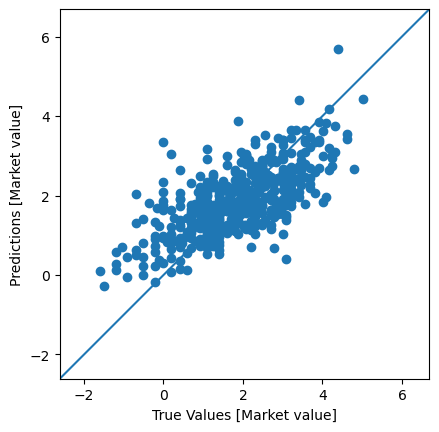

In [1340]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Market value]')
plt.ylabel('Predictions [Market value]')
min_val = min(min(test_labels),min(test_predictions))-1
max_val = max(max(test_labels),max(test_predictions))+1
lims = [min_val, max_val]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()
#print(f"% of samples < 60 million: {len([x for x in test_labels if x < 60])/test_labels.shape[0]}")


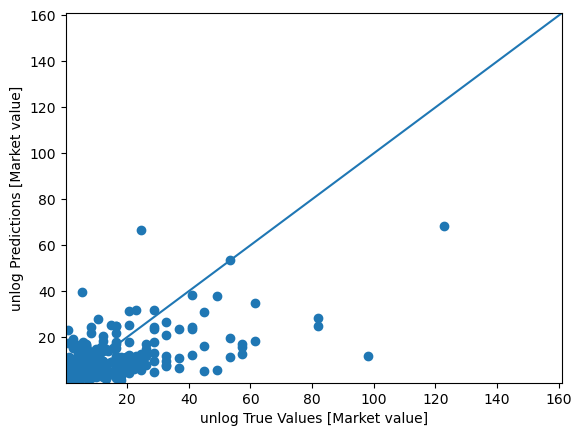

% of samples < 60 million: 0.9852320675105485


In [1341]:
unlog_test_labels = np.exp(test_labels - min_mv)  
unlog_test_predictions = np.exp(test_predictions - min_mv)  
plt.scatter(unlog_test_labels, unlog_test_predictions)
plt.xlabel('unlog True Values [Market value]')
plt.ylabel('unlog Predictions [Market value]')
min_val = min(min(unlog_test_labels),min(unlog_test_predictions))
max_val = 160+1
#max_val = max(max(test_labels),max(test_predictions))+1
lims = [min_val, max_val]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

print(f"% of samples < 60 million: {len([x for x in unlog_test_labels if x < 60])/unlog_test_labels.shape[0]}")


In [1342]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(unlog_test_labels, unlog_test_predictions,squared=False)
MAE = mean_absolute_error(unlog_test_labels, unlog_test_predictions)

test_results={}

test_results['unlog'] = ["{:.4f}".format(MAE)]
test_results['unlog'].append("{:.4f}".format(RMSE))
pd.DataFrame(test_results, index=['Mean absolute error','Root mean square error']).T

,Mean absolute error,Root mean square error
unlog,6.3873,13.6549
